In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = yfinance.download (tickers = "BTC-USD", start = "1985-01-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327


In [4]:
data = df['Close'].values
lows = df['Low'].values
highs = df['High']

In [5]:
profits = []
for i in range(data.shape[0]-1):
    profits.append((data[i+1]-data[i])/data[i])

In [6]:
profitslow = []
for i in range(lows.shape[0]-1):
    profitslow.append((lows[i+1]-lows[i])/lows[i])

In [7]:
profitshigh = []
for i in range(highs.shape[0]-1):
    profitshigh.append((highs[i+1]-highs[i])/highs[i])

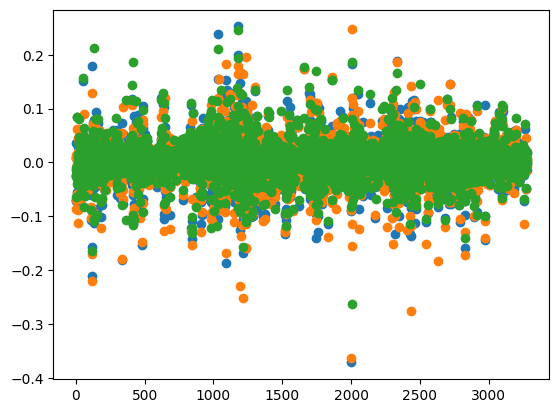

In [8]:
plt.plot(profits,'o')
plt.plot(profitslow,'o')
plt.plot(profitshigh,'o')

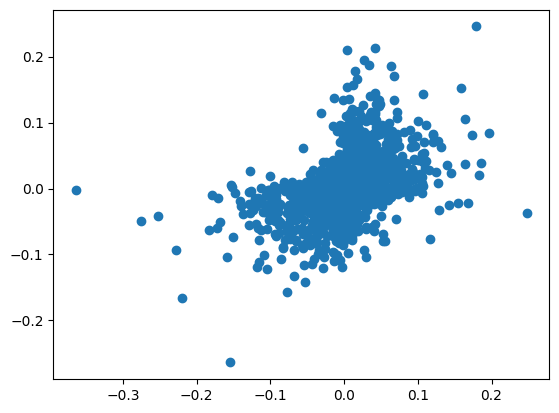

In [9]:
plt.plot(profitslow,profitshigh,'o')

In [10]:
prof1g = []
for i in range (len(profits)-2):
    if (profits[i]<-0.043) & (profits[i+1]>0.047):
        prof1g.append(profits[i+2])

In [11]:
np.mean(prof1g)

-0.01112945396879526

In [12]:
prof1g

[-0.00832520380537532,
 0.03822943016215105,
 0.019051573922217898,
 -0.004137243904078898,
 -0.013513581619651651,
 0.03873863613830781,
 0.016870179986421718,
 0.04629838404911713,
 -0.028368970549037503,
 -0.003430903583139107,
 0.011625867697059871,
 -0.052615134180676947,
 -0.03526321533283932,
 -0.017113772931712665,
 -0.036773444973354656,
 0.01589270609507489,
 -0.03899407015352066,
 -0.03172543781918562,
 -0.017746089738599164,
 -0.026379244232229333,
 -0.036104533704081856,
 -0.13009972955850596,
 -0.06530552710121189,
 0.04963733427047886,
 0.001369043695488474,
 0.050138030111625806,
 -0.02842289017956737,
 0.025407475685806567,
 -0.017893076896599622,
 -0.08528232829817226,
 -0.007847826326095642,
 0.028661855288592764,
 0.0303064775724482,
 -0.03673489084648809,
 0.0022510102605890277,
 -0.031414436476635325,
 -0.03277624957004593]

In [13]:
profits

[-0.07192557601231182,
 -0.0698426450868382,
 0.03573491642945347,
 -0.024658544547392688,
 0.008352101649706506,
 0.0836474178342121,
 -0.028880814347395964,
 -0.02748309167979621,
 -0.017369943788794938,
 -0.012128327693262657,
 -0.05591457216687109,
 -0.004544208904801477,
 0.03056723873255824,
 -0.0086033379705208,
 -0.022269722208609885,
 -0.04148536263261309,
 -0.08524332054467348,
 -0.025408487399317073,
 0.0298555425808324,
 0.018504665621736038,
 0.04983235561959068,
 0.03424377642532238,
 -0.00948970552383997,
 0.0020383765103399285,
 0.04485245473017013,
 0.03134333965318784,
 0.026781810112118373,
 -0.01520938193814905,
 -0.030946924386216924,
 0.003142012804338366,
 0.02002301076852436,
 -0.004843619645193634,
 -0.01720204787552617,
 0.009481656731152848,
 -0.00858274545359358,
 -0.06457126822962153,
 -0.00020085812996057425,
 -0.030903194098507024,
 0.021404073474679104,
 -0.004835006905739262,
 0.013113716357861814,
 -0.061593676352636746,
 0.028945916782262517,
 -0.0202

In [14]:
np.mean(profits)

0.0019376041672795222

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          2.,   2.,   0.,   3.,   1.,   4.,   2.,   1.,   8.,   7.,  16.,
          6.,   9.,  10.,  17.,  21.,  44.,  34.,  40.,  49.,  65.,  99.,
        124., 151., 214., 361., 454., 375., 278., 186., 151., 110.,  86.,
         72.,  59.,  42.,  26.,  24.,  25.,  17.,   8.,  10.,  16.,  10.,
          7.,   7.,   3.,   3.,   1.,   1.,   2.,   3.,   0.,   0.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-0.37169539, -0.36545371, -0.35921204, -0.35297037, -0.3467287 ,
        -0.34048703, -0.33424536, -0.32800369, -0.32176202, -0.31552035,
        -0.30927868, -0.30303701, -0.29679534, -0.29055367, -0.28431199,
        -0.27807032, -0.27182865, -0.26558698, -0.25934531, -0.25310364,
        -0.24686197, -0.24

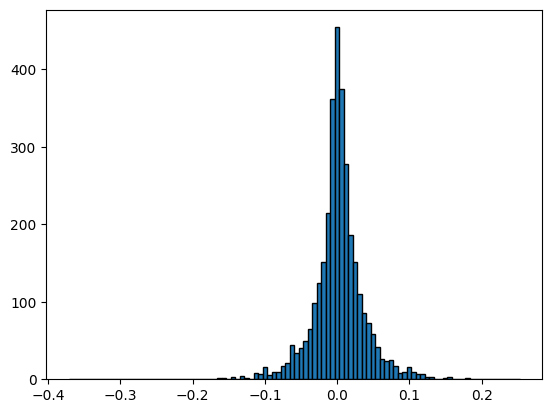

In [22]:
plt.hist(profits, bins=100, edgecolor='k')

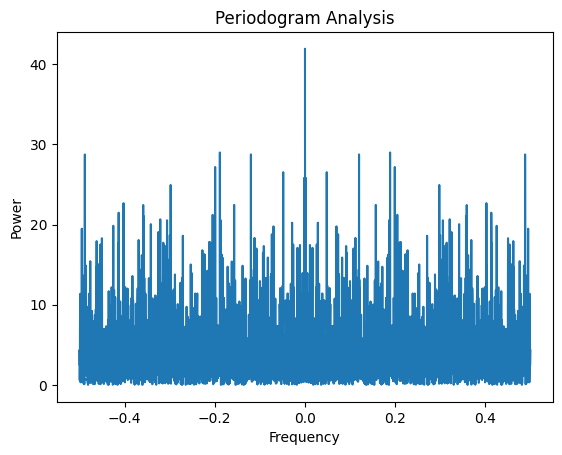

In [406]:
t = np.linspace(1, len(profits), len(profits))
periodogram = np.abs(np.fft.fft(profits))**2

# Frequencies corresponding to the periodogram
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])
plt.plot(frequencies, periodogram)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram Analysis')
plt.show()

In [407]:
xdata = np.zeros((len(profits)-5,5))
for i in range (len(profits)-5):
    xdata[i,:]= profits[i:i+5]

In [408]:
pca = PCA(n_components=2)  # Choose the number of principal components
xpca = pca.fit_transform(xdata)

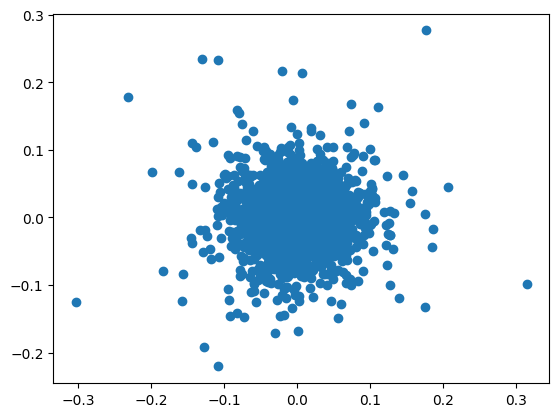

In [409]:
plt.plot(xpca[:,0] , xpca[:,1],'o')

In [410]:
slider = []
s = 360
for i in range(len(profits)-s):
    slider.append(np.sum(profits[i:i+s]))

In [411]:
np.max(data)

67566.828125

12207.062627515714

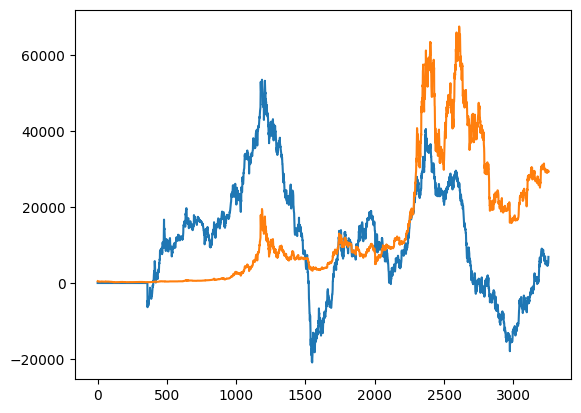

In [413]:
sk = [slid * 15000 for slid in slider]
final = s*[0]+sk
plt.plot(final)
plt.plot(data)
np.mean(slider)*15000
#plt.plot(data)

In [127]:
highlow = (highs - lows)/data

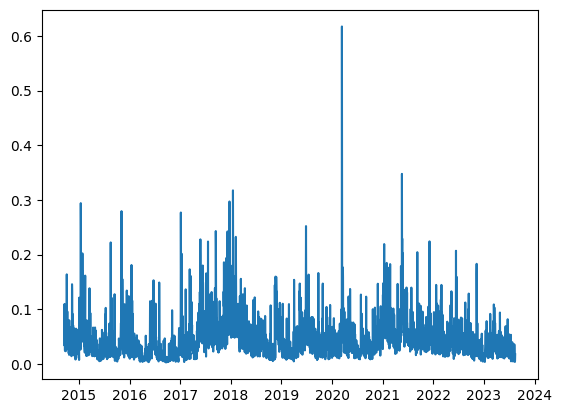

In [130]:
plt.plot(highlow)

In [132]:
prof1g = []
for i in range (len(highlow)):
    if (highlow[i]>0.1):
        prof1g.append(highlow[i+1])

In [134]:
np.mean(prof1g)

0.09413746220249636

/var/folders/cy/s7_pzg4x2xxcg7cty448hrxc0000gn/T/ipykernel_68162/1239029782.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.array(profits)))
/var/folders/cy/s7_pzg4x2xxcg7cty448hrxc0000gn/T/ipykernel_68162/1239029782.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(np.array(profits)))


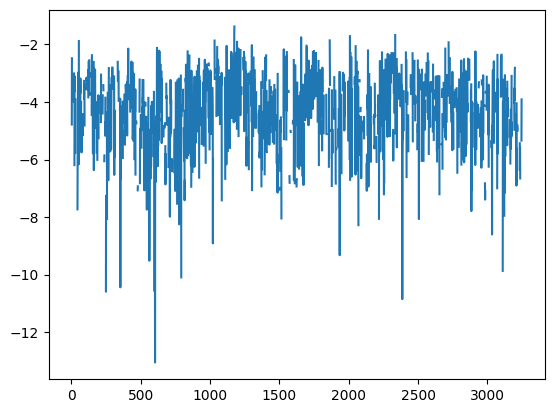

In [414]:
plt.plot(np.log(np.array(profits)))

In [416]:
vol = df['Volume'].values

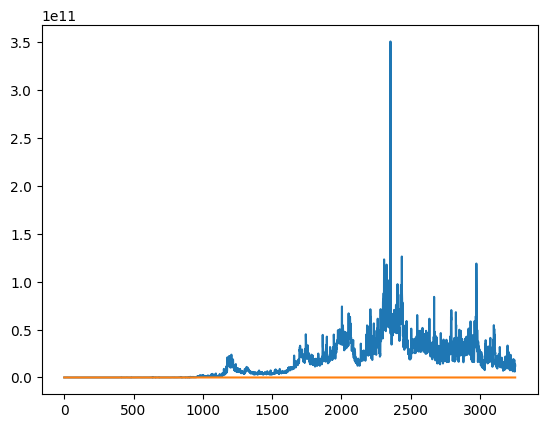

In [422]:
plt.plot(vol)
plt.plot(data)

12207.062627515714

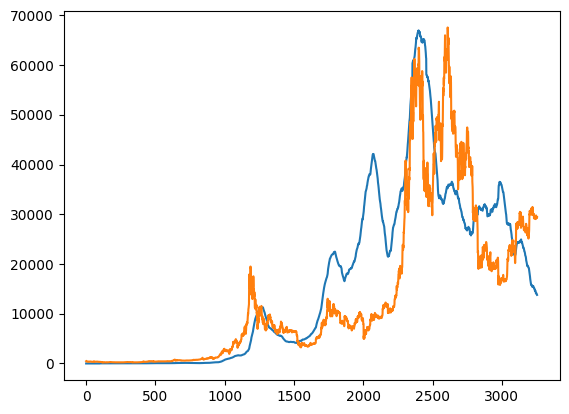

In [432]:
volslider = []
s = 100
for i in range(len(vol)-s):
    volslider.append(np.sum(vol[i:i+s]))
sk = [slid /10e7 for slid in volslider]
final = s*[0]+sk
plt.plot(final)
plt.plot(data)
np.mean(slider)*15000
#plt.plot(data)

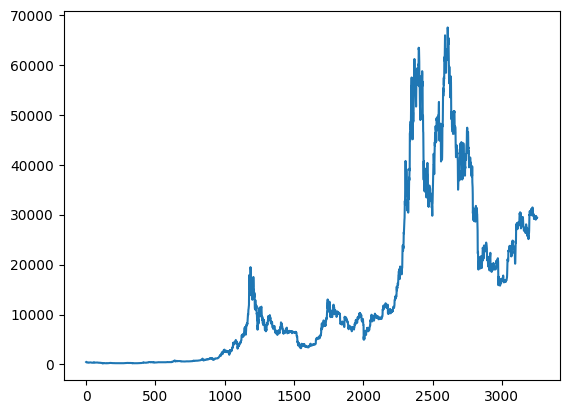

In [426]:
plt.plot(data)

In [434]:
np.max(highs)

68789.625

In [437]:
vols = []
for i in range(vol.shape[0]-1):
    vols.append((vol[i+1]-vol[i])/vol[i])

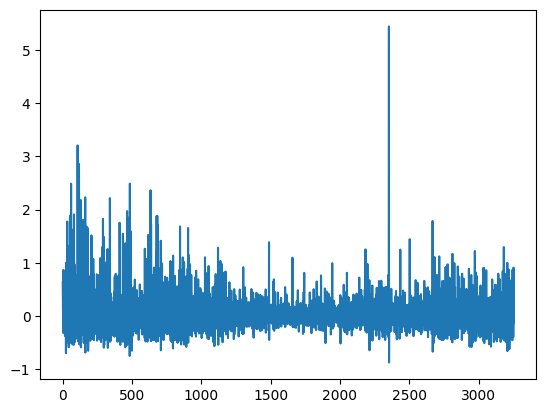

In [438]:
plt.plot(vols)

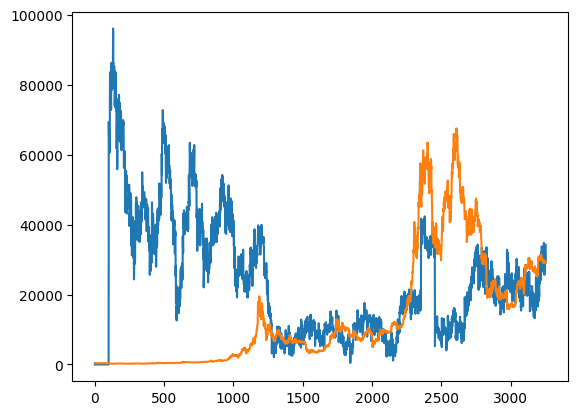

In [443]:
volslider = []
s = 100
for i in range(len(vols)-s):
    volslider.append(np.sum(vols[i:i+s]))
sk = [slid *5000 for slid in volslider]
final = s*[0]+sk
plt.plot(final)
np.mean(slider)*15000
plt.plot(data)